# SimBi Solve

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lucashofer/simbi/blob/main/docs/notebooks/SimBi_Solve.ipynb)

Often times, we need to solve for various quantities such as the temperature, or chemical potential before simulating the density of the atom cloud. Here we show how SimBi can handle this.

## Installing and Importing

First we install SimBi with pip

In [ ]:
!pip install simbi 

Now let's install some other Python packages which we'll need.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import physical_constants
import simbi

First let's define some general experimental parameters 

In [2]:
a0 = physical_constants['Bohr radius'][0]
amu = physical_constants['atomic mass constant'][0]
a = 100 * a0
m = 87 * amu
wx = 2 * np.pi * 350
wy = 2 * np.pi * 300
wz = 2 * np.pi * 30
trap_freqs = (wx, wy, wz)
t = .001

Now unlike the quickstart example, we have not defined either the chemical potential $\mu$ or the temperature $T$ of our system. Sometimes we prefer to set the atom number of our system and use these to determine $\mu$ and $T$. For instance, let's say we have a total number of atoms $N=10^5$ and a condensate fraction of $cf=0.1$. This allows us to calculate the number of atoms in the BEC $N_0$ as well as the chemical potential $\mu$

In [3]:
ntot = 1e5
cf = 0.1
nbec = cf * ntot
mu = simbi.chemical_potential(trap_freqs, m, a, nbec)
print(mu)

7.351934405097466e-31


Now, we can calculate the number of atoms in the thermal cloud $N_{\text{ex}}$ and then use that to calculate the temperature of the thermal cloud

In [4]:
nex = ntot - nbec
T, res = simbi.get_temperature(trap_freqs, -mu, nex, tol=1e-12)
print(T)

3.181459944797764e-07


There's also a SimBi function that does all this

In [21]:
mu, T = simbi.mu_temperature(trap_freqs, m, a, ntot, cf)

Now using $\mu$ and $T$ we can get the density of the bimodal cloud (see the Quickstart notebook for more info on simulating densities).

In [22]:
all_radii = simbi.bimodal_radii(trap_freqs, m, T, a, mu, t)
init_sigmas, t_sigmas, init_tf_radii, expans_scalars, tf_radii = all_radii
(x,y,z), coord_maps, diff_elements, clength = simbi.get_coordinates(t_sigmas, 6, multi=True)
coords_3d, coords_2d, coords_1d = coord_maps
dv, da, dx = diff_elements

densities_1d = simbi.bimodal_density(coords_1d, trap_freqs, m, T, a, mu, t)

Now let's plot it

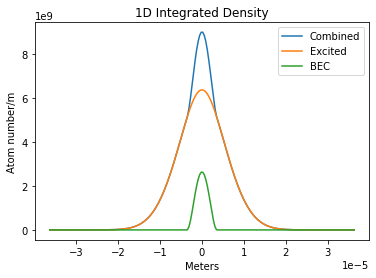

In [23]:
plabels = ['Combined', 'Excited', 'BEC']
slicev = int(clength / 2)

plt.figure()
plt.title('1D Integrated')
for label, density in zip(plabels, densities_1d):
    plt.plot(x, density, label=label)
plt.ylabel('Atom number/m')
plt.title('1D Integrated Density')
plt.xlabel('Meters')
plt.legend()

However, we need to keep in mind that even that numerically solving for the temperature means that the actual atom numbers will deviate from what we defined them as

In [16]:
atom_numbers = simbi.bimodal_atom_numbers(trap_freqs, m, T, a, mu)

plabels = ['Combined', 'Thermal', 'BEC', 'Condensed Fraction']

for num, plabel in zip(atom_numbers, plabels):
    print(f'{plabel}: {num}')

Combined: 99999.54717601756
Thermal: 89999.54717601766
BEC: 9999.999999999902
Condensed Fraction: 0.10000045282603197
